In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import keras
from keras import Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.losses import MSE
from matplotlib import pyplot as plt
from math import cos
from math import sin
from math import pi
import math
from math import radians
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


inp = []
out = []

# -------------------------------------------   number of captured images
num = 700

# -------------------------------------------   reading the 'times.txt' file
# -------------------------------------------   times are expressed in milliseconds
file = open('/kaggle/input/steering-wheel/times.txt', 'rt')
times = []

for line in file:
    times.append(int(line.strip()))


# -------------------------------------------   steering angles in degrees
# -------------------------------------------   times are expressed in milliseconds
# -------------------------------------------   'T' denotes the label for the times column
# -------------------------------------------   'A' denotes the label for the angles column
df = pd.read_csv('/kaggle/input/steering-wheel/IMU.csv')
encoder_times  = list(df['T'])
encoder_angles = list(df['A'])




for i in range(num):
    img = cv.imread('/kaggle/input/steering-wheel/images/' + str(i) + '.jpg', cv.IMREAD_COLOR)
    inp.append(img/255.0)

    time = times[i]

    diff = [abs(x - time) for x in encoder_times]
    diff = np.array(diff)
    j = np.argmin(diff)

    theta = radians(encoder_angles[j])
    vector = np.array([cos(theta), sin(theta)])
    out.append(vector)



inp = np.array(inp)
out = np.array(out)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 120, 160, 1)       76        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 60, 80, 1)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 78, 1)         10        
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 57, 77, 1)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4389)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

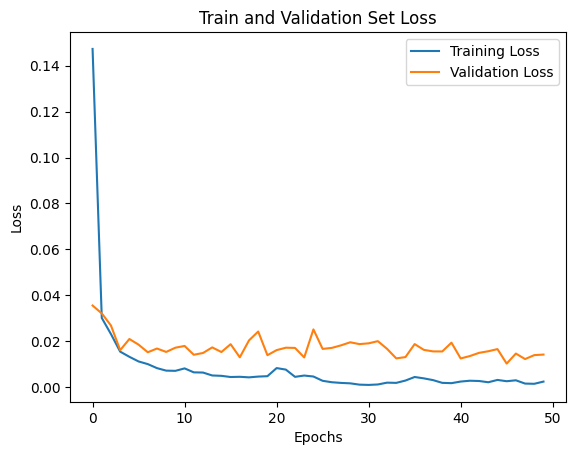

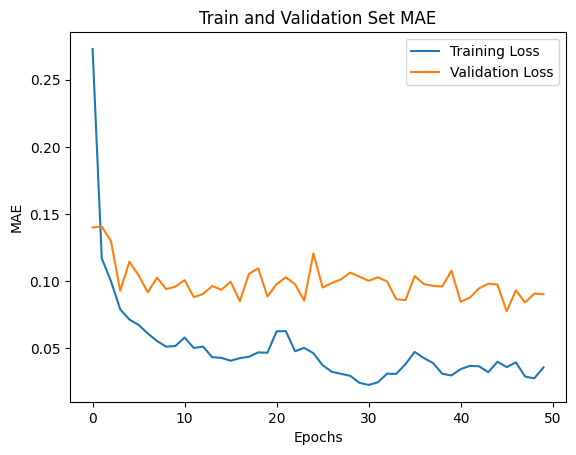

In [4]:
checkpoint_filepath = 'model'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = True,
    mode = 'min')

#-------------------------------------------------------  CNN model
input = Input(shape = (600, 800, 3))

layer1 = Conv2D(filters = 1, kernel_size = (5, 5), strides = (5, 5),
                 padding = 'valid', activation = 'relu', use_bias = True)

layer2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid')

layer3 = Conv2D(filters = 1, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'valid', activation = 'relu', use_bias = True)

layer4 = MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid')

layer5 = Flatten()

layer6 = Dense(units = 10, activation = 'relu', use_bias = True)
layer7 = Dense(units = 2, activation = 'tanh', use_bias = True)

model = keras.Sequential( [input, layer1, layer2, layer3, layer4, layer5, layer6, layer7] )

model.summary()

model.compile(optimizer = Adam(learning_rate = 0.01), loss = MSE, metrics = ['mae'])
results = model.fit(x = inp, y = out, batch_size = 10, epochs = 50,
                     validation_split = 0.1, shuffle = True,
                       callbacks = [model_checkpoint_callback])


plt.figure()
plt.title('Train and Validation Set Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

plt.figure()
plt.title('Train and Validation Set MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(results.history['mae'])
plt.plot(results.history['val_mae'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [5]:
predictions = model.predict(inp)

22/22 [==============================] - 2s 72ms/step


In [10]:
from math import atan2, degrees
angles = []
for v in predictions:
    angles.append(degrees(atan2(v[1], v[0])))

In [15]:
f = open('CNN.txt', 'wt')
for theta in angles:
    f.write(str(theta) + '\n')
f.close()